In [ ]:
import pandas as pd
import numpy as np

In [ ]:
station_infor = pd.read_csv("/content/weather_stations.csv")
weather = pd.read_csv("/content/nyc_weather_2018.csv")

In [ ]:
station_infor.head()

,id,name,latitude,longitude,elevation
0,GHCND:US1CTFR0022,"STAMFORD 2.6 SSW, CT US",41.064100,-73.577000,36.6
1,GHCND:US1CTFR0039,"STAMFORD 4.2 S, CT US",41.037788,-73.568176,6.4
2,GHCND:US1NJBG0001,"BERGENFIELD 0.3 SW, NJ US",40.921298,-74.001983,20.1
3,GHCND:US1NJBG0002,"SADDLE BROOK TWP 0.6 E, NJ US",40.902694,-74.083358,16.8
4,GHCND:US1NJBG0003,"TENAFLY 1.3 W, NJ US",40.914670,-73.977500,21.6


In [ ]:
weather.head()

,date,datatype,station,attributes,value
0,2018-01-01T00:00:00,PRCP,GHCND:US1CTFR0039,",,N,",0.0
1,2018-01-01T00:00:00,PRCP,GHCND:US1NJBG0015,",,N,",0.0
2,2018-01-01T00:00:00,SNOW,GHCND:US1NJBG0015,",,N,",0.0
3,2018-01-01T00:00:00,PRCP,GHCND:US1NJBG0017,",,N,",0.0
4,2018-01-01T00:00:00,SNOW,GHCND:US1NJBG0017,",,N,",0.0


In [ ]:
station_infor.rename(columns={"id":"station"},inplace=True)
station_infor.head()

,station,name,latitude,longitude,elevation
0,GHCND:US1CTFR0022,"STAMFORD 2.6 SSW, CT US",41.064100,-73.577000,36.6
1,GHCND:US1CTFR0039,"STAMFORD 4.2 S, CT US",41.037788,-73.568176,6.4
2,GHCND:US1NJBG0001,"BERGENFIELD 0.3 SW, NJ US",40.921298,-74.001983,20.1
3,GHCND:US1NJBG0002,"SADDLE BROOK TWP 0.6 E, NJ US",40.902694,-74.083358,16.8
4,GHCND:US1NJBG0003,"TENAFLY 1.3 W, NJ US",40.914670,-73.977500,21.6


In [ ]:
data = station_infor.merge(weather,on="station",how='inner') \
                            .drop_duplicates(["station","datatype"]).reset_index(drop=True)

In [ ]:
data.shape

(633, 9)

In [ ]:
snow_avg= data.query('datatype=="SNOW" and name.str.contains("NJ US")',engine="python")
snow_avg.elevation.mean()

58.348484848484865

In [ ]:
fb_2018 = pd.read_csv("/content/fb_2018.csv")

In [ ]:
fb_p = fb_2018.assign(p_change = lambda x: x.volume.pct_change())
fb_p

,date,open,high,low,close,volume,p_change
0,2018-01-02,177.68,181.58,177.5500,181.42,18151903,NaN
1,2018-01-03,181.88,184.78,181.3300,184.67,16886563,-0.069708
2,2018-01-04,184.90,186.21,184.0996,184.33,13880896,-0.177992
3,2018-01-05,185.59,186.90,184.9300,186.85,13574535,-0.022071
4,2018-01-08,187.20,188.90,186.3300,188.28,17994726,0.325624
...,...,...,...,...,...,...,...
246,2018-12-24,123.10,129.74,123.0200,124.06,22066002,-0.612207
247,2018-12-26,126.00,134.24,125.8900,134.18,39723370,0.800207
248,2018-12-27,132.44,134.99,129.6700,134.52,31202509,-0.214505
249,2018-12-28,135.34,135.92,132.2000,133.20,22627569,-0.274816


In [ ]:
fb_2018['shift_vol']=fb_2018.volume.shift(1)
fb_2018.head()

,date,open,high,low,close,volume,shift_vol
0,2018-01-02,177.68,181.58,177.5500,181.42,18151903,NaN
1,2018-01-03,181.88,184.78,181.3300,184.67,16886563,18151903.0
2,2018-01-04,184.90,186.21,184.0996,184.33,13880896,16886563.0
3,2018-01-05,185.59,186.90,184.9300,186.85,13574535,13880896.0
4,2018-01-08,187.20,188.90,186.3300,188.28,17994726,13574535.0


In [ ]:
fb_p2 = fb_2018.assign(p_change = lambda x: (x.volume.sub(x.shift_vol)).div(x.shift_vol))
fb_p2.head()

,date,open,high,low,close,volume,shift_vol,p_change
0,2018-01-02,177.68,181.58,177.5500,181.42,18151903,NaN,NaN
1,2018-01-03,181.88,184.78,181.3300,184.67,16886563,18151903.0,-0.069708
2,2018-01-04,184.90,186.21,184.0996,184.33,13880896,16886563.0,-0.177992
3,2018-01-05,185.59,186.90,184.9300,186.85,13574535,13880896.0,-0.022071
4,2018-01-08,187.20,188.90,186.3300,188.28,17994726,13574535.0,0.325624


(30, 3)
(3, 1)


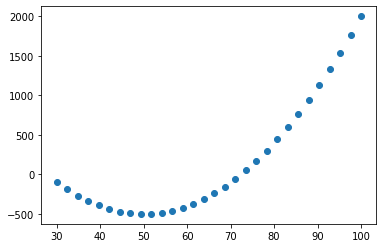

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('data_square.csv').values
N = data.shape[0]

x = data[:, 0].reshape(-1, 1)
y = data[:, 1].reshape(-1, 1)

plt.scatter(x, y)

#nomarlize x = x/100
x = np.hstack((np.ones((N, 1)), x, np.square(x)))
# w = np.array([0., 1., 2.]).reshape(-1,1)

print(x.shape)
print(w.shape)

In [ ]:
w = np.dot(np.linalg.inv(np.dot(x.T,x)), np.dot(x.T,y))

No handles with labels found to put in legend.


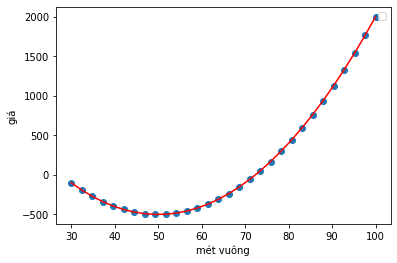

In [ ]:
predict = np.dot(x, w)
x = data[:, 0].reshape(-1, 1)
y = data[:, 1].reshape(-1, 1)
plt.plot(x, predict, color = "red")
plt.scatter(x, y)
plt.xlabel('mét vuông')
plt.ylabel('giá')
plt.legend()
plt.show()